In [87]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/istanbulmarket-socioeconomicstatus/IstanbulMarket_SOS.csv


# We can say that Istanbul is the city that comes closest to the level of development in our country. But
# We cannot say that the level of development in the districts of Istanbul has much to do with each other.
# Of course, we know that the main reason for this situation is immigration. More than its area
# In Istanbul, which is home to a large population, the districts are so socioeconomically
# The difference is not surprising. The livability level of these districts in Istanbul
# The Metropolitan Municipality has a socioeconomic status (SOS) rating on a district basis with its own data.
# He shared it and presented it to us. Using this data, we also analyzed Bim  and Migros in the districts.
# We wanted to examine the effect of their numbers on this socioeconomic status.

# Load the Data

In [96]:
data = pd.read_csv('../input/istanbulmarket-socioeconomicstatus/IstanbulMarket_SOS.csv')

# Take a Quick Look at the Data Structure


In [54]:
data.head()

,District,Bim_Count,Migros_Count,Socioeconomic_Status
0,Adalar,2,1,68.75
1,Arnavutkoy,58,2,25.00
2,Atasehir,55,15,62.50
3,Avcilar,49,10,43.75
4,Bagcilar,73,11,31.25


# Context
**It is possible to see the effect of the markets in Istanbul on the socioeconomic status of the districts.**

# Content
**District <- Districts in Istanbul**
**BımCount <- Number of Bim in Istanbul ( Cheap Market Chain ) MigrosCount <- Number of Migros in Istanbul ( Quality Market Chain )**
**Socioeconomic_Status <- Districts' quality of life score**

# Information About Data

In [55]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35 entries, 0 to 34
Data columns (total 4 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   District              35 non-null     object 
 1   Bim_Count             35 non-null     int64  
 2   Migros_Count          35 non-null     int64  
 3   Socioeconomic_Status  35 non-null     float64
dtypes: float64(1), int64(2), object(1)
memory usage: 1.2+ KB


# Let's take a look at the numerical attributes


In [56]:
data.describe()

,Bim_Count,Migros_Count,Socioeconomic_Status
count,35.000000,35.000000,35.000000
mean,46.085714,12.114286,48.285714
std,23.171193,10.334896,18.649450
min,2.000000,1.000000,18.750000
25%,30.500000,5.000000,31.250000
50%,46.000000,13.000000,43.750000
75%,58.000000,15.500000,59.375000
max,113.000000,58.000000,87.500000


# Histogram Plot For Integer Variables

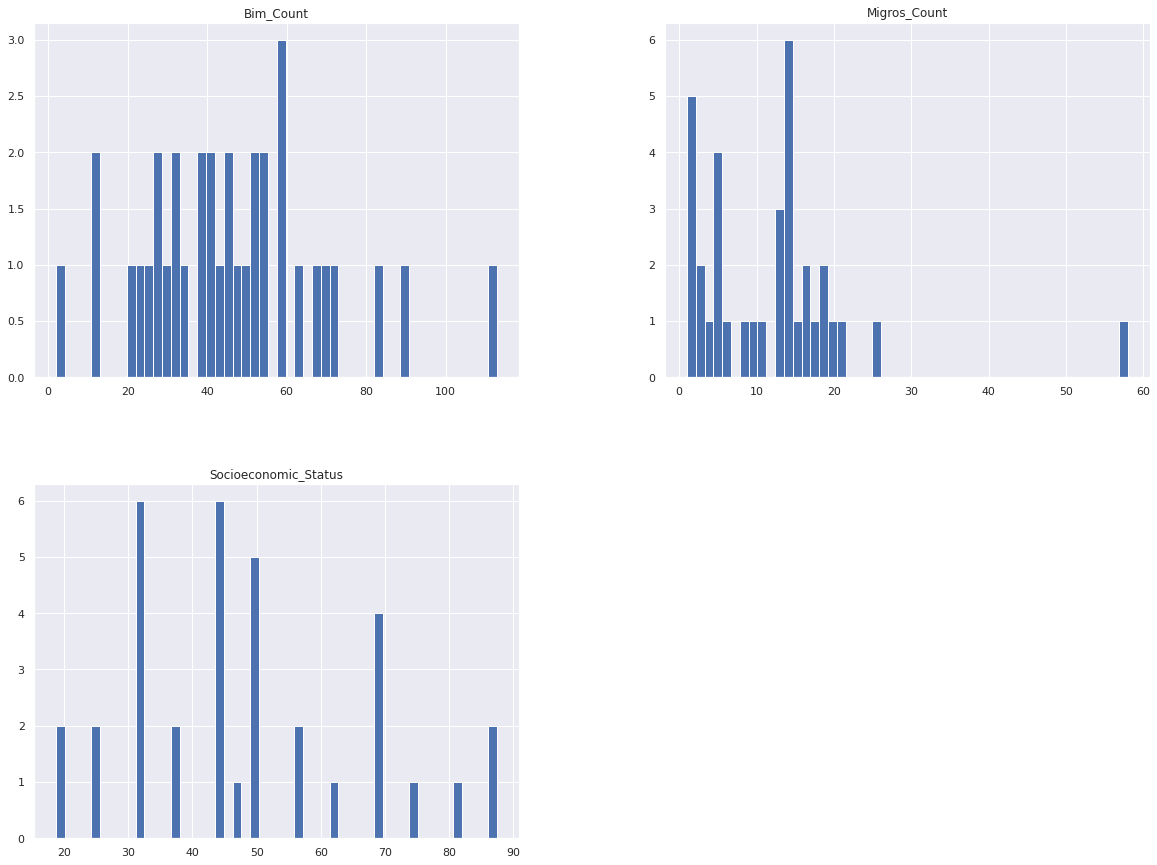

In [57]:
data.hist(bins = 50, figsize = (20,15))
plt.show()

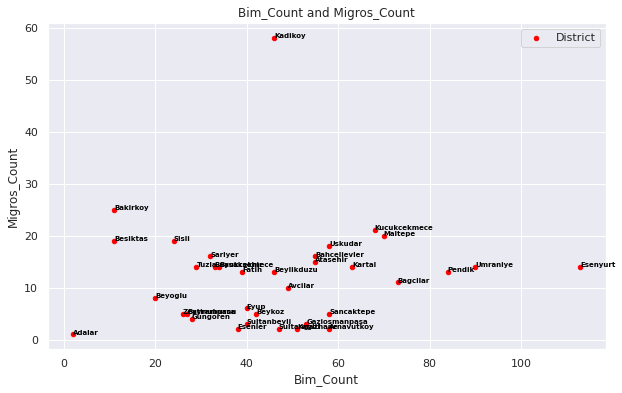

In [58]:
sns.set(style="darkgrid")
sc=data.plot(kind='scatter',x='Bim_Count',y='Migros_Count',color='red',label='District')

for line in range(0,data.shape[0]):
     sc.text(data.Bim_Count[line]+0.01, data.Migros_Count[line], 
     data.District[line], horizontalalignment='left', 
     color='black', weight='semibold',size=7)
        
sc.set_xlabel('Bim_Count')
sc.set_ylabel('Migros_Count')
sc.set_title('Bim_Count and Migros_Count')
sc=plt.gcf()
sc.set_size_inches(10,6)

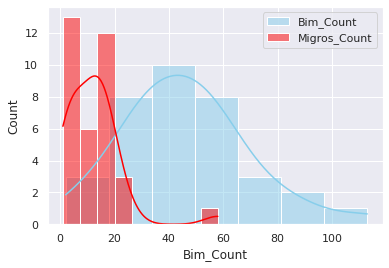

In [59]:
sns.set(style="darkgrid")

sns.histplot(data, x="Bim_Count", color="skyblue", label="Bim_Count", kde=True)
sns.histplot(data, x="Migros_Count", color="red", label="Migros_Count", kde=True)

plt.legend() 
plt.show()

# Looking for Correlations


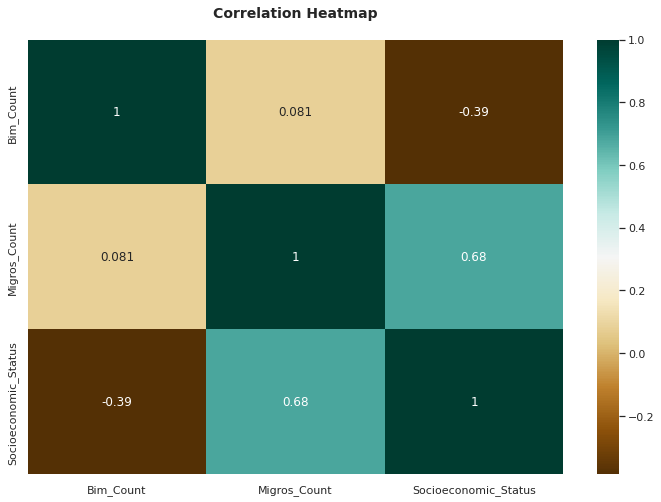

In [60]:
plt.figure(figsize=(12,8))
sns.heatmap(data.corr(),annot=True,cmap='BrBG')
plt.title('Correlation Heatmap\n',fontweight='bold',fontsize=14)
plt.show()

In [61]:
data["Bim_Migros"] = data["Bim_Count"] / data["Migros_Count"]
data

,District,Bim_Count,Migros_Count,Socioeconomic_Status,Bim_Migros
0,Adalar,2,1,68.75,2.000000
1,Arnavutkoy,58,2,25.00,29.000000
2,Atasehir,55,15,62.50,3.666667
3,Avcilar,49,10,43.75,4.900000
4,Bagcilar,73,11,31.25,6.636364
5,Bahcelievler,55,16,56.25,3.437500
6,Bakirkoy,11,25,81.25,0.440000
7,Basaksehir,34,14,37.50,2.428571
8,Bayrampasa,27,5,31.25,5.400000
9,Besiktas,11,19,87.50,0.578947


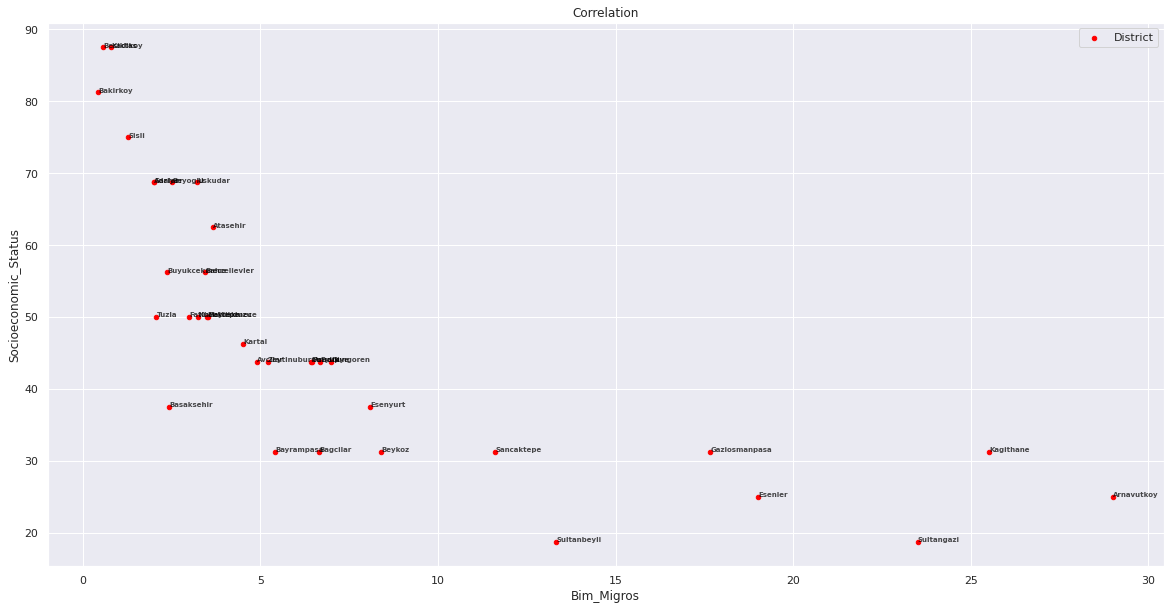

In [62]:
sns.set(style="darkgrid")
sc=data.plot(kind='scatter',x='Bim_Migros',y='Socioeconomic_Status',color='red',label='District')

for line in range(0,data.shape[0]):
     sc.text(data.Bim_Migros[line]+0.01, data.Socioeconomic_Status[line], 
     data.District[line], horizontalalignment='left', 
     color='black', weight='semibold',size=7, alpha=0.7)
        
sc.set_xlabel('Bim_Migros')
sc.set_ylabel('Socioeconomic_Status')
sc.set_title('Correlation')
sc=plt.gcf()
sc.set_size_inches(20,10)

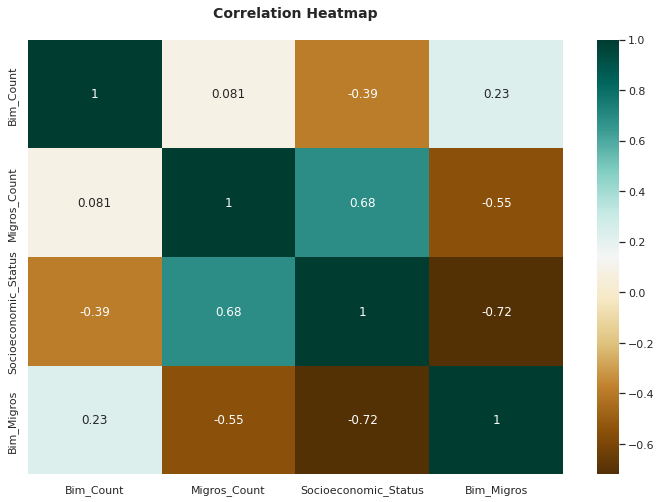

In [63]:
plt.figure(figsize=(12,8))
sns.heatmap(data.corr(),annot=True,cmap='BrBG')
plt.title('Correlation Heatmap\n',fontweight='bold',fontsize=14)
plt.show()

# Create Test Set

In [97]:
from sklearn.model_selection import train_test_split
train_set, test_set = train_test_split(data, test_size=0.2, random_state=42)
test_set.head()

,District,Bim_Count,Migros_Count,Socioeconomic_Status
26,Sancaktepe,58,5,31.25
13,Buyukcekmece,33,14,56.25
24,Maltepe,70,20,50.00
21,Kagithane,51,2,31.25
15,Esenyurt,113,14,37.50


In [104]:
data = train_set.drop("Socioeconomic_Status", axis=1) # drop labels for training set
data_labels = train_set["Socioeconomic_Status"].copy()
data_labels.shape

(28,)

# Create Pipeline

In [110]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

num_data = data.select_dtypes(include=[np.number])

pipeline = Pipeline([
    ('std_scalar', StandardScaler())
])

train_set = pipeline.fit_transform(num_data)
test_set = pipeline.transform(num_data)

# Select and Train a Model


In [111]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(train_set, data_labels)

LinearRegression()

In [113]:
some_data = num_data.iloc[:5]
some_labels = data_labels.iloc[:5]
some_data_prepared = pipeline.transform(some_data)

print("Predictions:", lin_reg.predict(some_data_prepared))

Predictions: [54.13425502 47.59100581 43.53291234 71.34445517 50.98837956]


In [114]:
print("Labels:", list(some_labels))

Labels: [68.75, 31.25, 43.75, 87.5, 68.75]


# Cost Function(MSE)

In [115]:
from sklearn.metrics import mean_squared_error

data_predictions = lin_reg.predict(train_set)
lin_mse = mean_squared_error(data_labels, data_predictions)
lin_rmse = np.sqrt(lin_mse)
lin_rmse


11.188967063835257

# Cross Validation

In [117]:
from sklearn.model_selection import cross_val_score

def display_scores(scores):
    print("Scores:", scores)
    print("Mean:", scores.mean())
    print("Standard deviation:", scores.std())



lin_scores = cross_val_score(lin_reg, train_set, data_labels,
                             scoring="neg_mean_squared_error", cv=10)
lin_rmse_scores = np.sqrt(-lin_scores)
display_scores(lin_rmse_scores)

Scores: [12.70216486 21.16708057  6.78084162  5.39231331 12.75724891  6.94195546
  6.89652776 36.51750526 14.28675566 20.90514868]
Mean: 14.434754208677521
Standard deviation: 9.132310314977394


In [121]:
y_pred = lin_reg.predict(test_set)
y_pred

array([ 54.13425502,  47.59100581,  43.53291234,  71.34445517,
        50.98837956,  52.83700361,  36.26333515,  52.56131729,
        59.1045665 ,  49.74580169,  49.71299756,  31.28208896,
        48.51415853,  33.04091673,  44.79735962,  66.05471854,
        50.61428087,  57.86198863,  41.48746354,  44.02729282,
        34.54824621,  34.25069048,  78.73431415, 105.13693987,
        47.99790863,  55.82747454,  39.42014532,  39.83798285])

# FINAL - RESULT

In [127]:
result = pd.DataFrame({'PassengerId':data['District'],'Score':y_pred})
result

,PassengerId,Score
12,Beyoglu,54.134255
8,Bayrampasa,47.591006
16,Eyup,43.532912
9,Besiktas,71.344455
33,Uskudar,50.988380
0,Adalar,52.837004
4,Bagcilar,36.263335
17,Fatih,52.561317
27,Sariyer,59.104567
5,Bahcelievler,49.745802


***Looking at the results of the research, especially Migros markets are dense and Bim markets are
more coffee, optics, perfumery, dry cleaning, veterinary, pet
products, aesthetic centers, real estate agents of foreign origin, bars, taverns.
In addition, these districts have a higher education level than Turkey's average. Ideological
In this sense, social democrats come to the fore.
In regions where Migros markets are few and Bim markets are high, there are more
There are carpets, rugs, curtains, yufka, Çiğköfte, coffee shops, chicken doner shops and repairmen.
Education level below Turkey average and ideologically more conservative and
nationalist vote rate.
If we consider the problem, the effect of the markets on this Socioeconomic Status awareness is visibly.
available.***

***Araştırma sonuçlarına bakarak özellikle Migros marketlerin yoğun olduğu ve Bim marketlerin
az olduğu ilçelerde daha fazla sayıda kahve, optik, parfümeri, kuru temizleme, veteriner, pet
ürünleri, estetik merkezleri, yabancı menşeili emlakçılar, bar, meyhane gözlemlemek mümkün.
Ayrıca bu ilçelerde Türkiye ortalamasının üstünde bir eğitim seviyesi mevcut. İdeolojik
anlamda ise sosyal demokrat ön plana çıkıyor.
Migros marketlerin az olduğu ve Bim marketlerin çok olduğu bölgelerde ise daha fazla sayıda
halı, kilim, perde, yufka, çiğköfte, kahvehane, tavuk döner dükkanları, tamirciler mevcut.
Türkiye ortalaması altında eğitim seviyesi ve ideolojik anlamda ise daha fazla muhafazakâr ve
milliyetçi oy oranı gözlemleniyor.
Problemi ele alırsak gözle görülür şekilde marketlerin bu Sosyoekonomik Statü farkında etkisi
mevcut.***